In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier


In [3]:
resumeDataSet = pd.read_csv("UpdatedResumeDataSet.csv")
resumeDataSet['CleanedResume'] = ''

resumeDataSet.head()

,Category,Resume,CleanedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
resumeDataSet['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
resumeDataSet['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [10]:
resumeDataSet.Resume.iloc[:1].values

array(['Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Inves

<AxesSubplot:xlabel='count', ylabel='Category'>

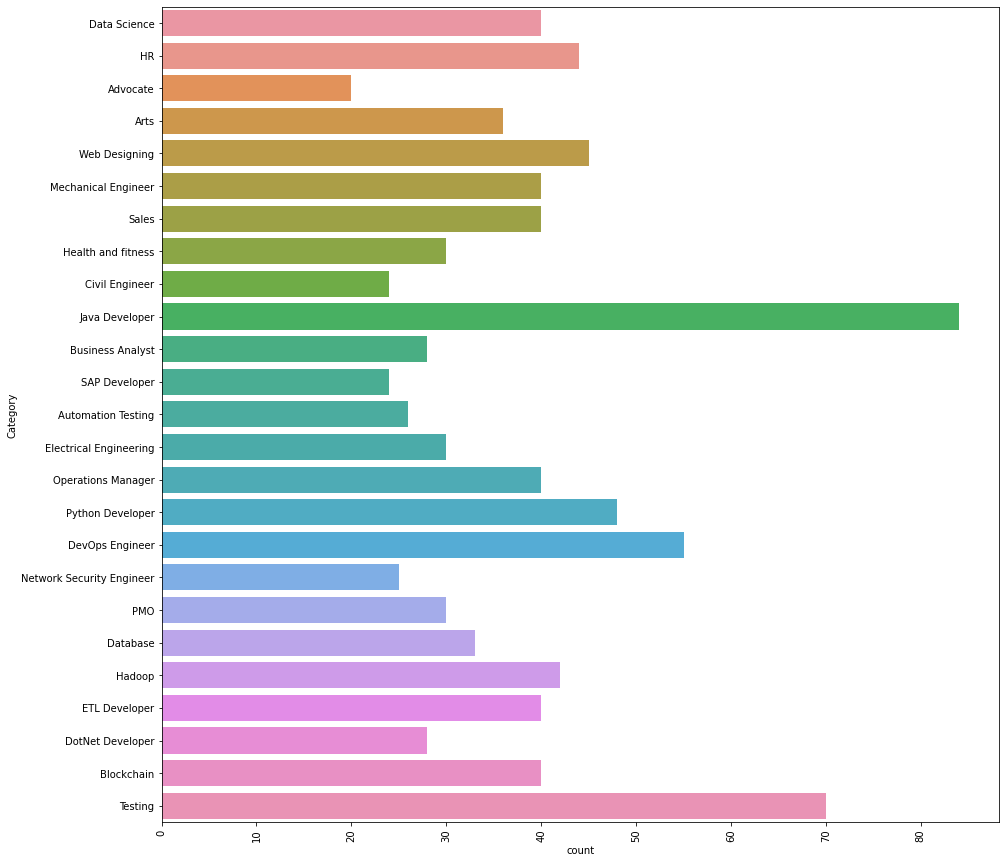

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category",data=resumeDataSet)

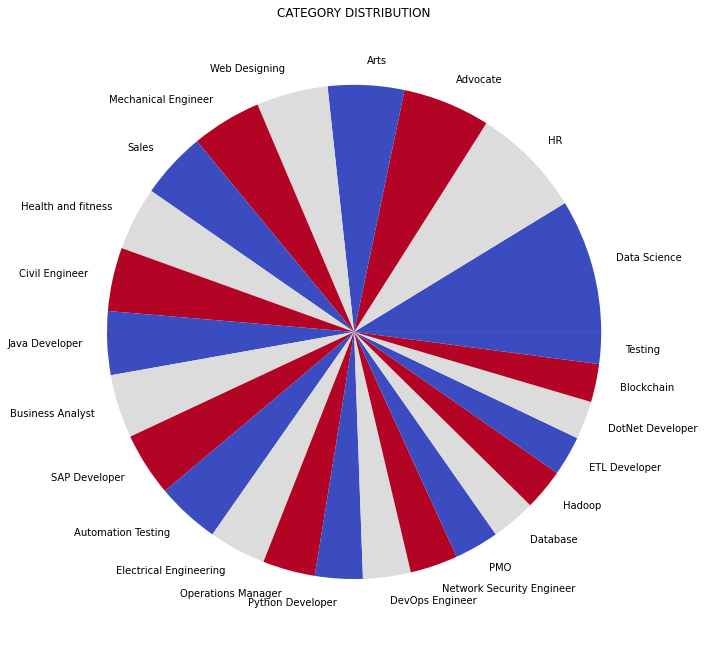

In [14]:
from matplotlib.gridspec import GridSpec

targetcount= resumeDataSet['Category'].value_counts()

target_labels = resumeDataSet['Category'].unique()


plt.figure(1,figsize=(25,25))

the_grid = GridSpec(2,2)

cmap  = plt.get_cmap('coolwarm')
color = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1],aspect=1,title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetcount,labels=target_labels ,colors=color)

plt.show()

In [15]:
# function that removes urls,hastags,mentions,special letter
# and puntuaction

In [19]:
import re

def cleanresume(resumetext):
    resumetext = re.sub('http\S+\s*',' ',resumetext)
    resumetext = re.sub('RT|cc',' ',resumetext)
    resumetext = re.sub('#\S+', '', resumetext)  # remove hashtags
    resumetext = re.sub('@\S+', '  ', resumetext)  # remove mentions
    resumetext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumetext)  # remove punctuations
    resumetext = re.sub(r'[^\x00-\x7f]',r' ', resumetext) 
    resumetext = re.sub('\s+', ' ', resumetext)  # remove extra whitespace
    return resumetext    

In [20]:
resumeDataSet['CleanedResume'] = resumeDataSet.Resume.apply(lambda x: cleanresume(x))

In [22]:
# Now as we have cleared the dataset, the next task 
# is to have a look at the Wordcloud. A Wordcloud (viz lib)
# represents the most numbers of words larger and 
# vice versa:

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string



onstepOfStopWords = set(stopwords.words('english') + ['``',"''"])

In [40]:
onstepOfStopWords

{"''",
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [44]:
totalWords = []

Sentences = resumeDataSet['Resume'].values

cleanedSentences = ""

for i in range(0,160):
    cleanedText = cleanresume(Sentences[i])
    cleanedSentences += cleanedText
    requireWords = nltk.word_tokenize(cleanedText)
    for word in requireWords:
        if word not in onstepOfStopWords and word not in string.punctuation:
            totalWords.append(word)
            
wordfreqdist = nltk.FreqDist(totalWords)

mostcommon = wordfreqdist.most_common(50)

print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [46]:
# covert these words into categorical values

In [48]:
from sklearn.preprocessing import LabelEncoder

var_mod= ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [53]:
requiredText = resumeDataSet['CleanedResume'].values
requriesTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
                    sublinear_tf= True,
                    stop_words='english',
                    max_features=1500)

word_vectorizer.fit(requiredText)
WordsFeatures = word_vectorizer.transform(requiredText)

In [68]:
WordsFeatures.get_shape()

(962, 1500)

In [69]:
word_vectorizer.get_feature_names()

['01',
 '07',
 '10',
 '10g',
 '11',
 '11g',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '20',
 '2000',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '21',
 '24',
 '26',
 '27',
 '28',
 '2nd',
 '30',
 '300',
 '31',
 '36',
 '39',
 '3d',
 '400',
 '48',
 '60',
 '72',
 '85',
 '96',
 'abap',
 'ability',
 'able',
 'academic',
 'academy',
 'achieve',
 'achieved',
 'achievements',
 'achieving',
 'act',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'ad',
 'added',
 'adding',
 'address',
 'adherence',
 'admin',
 'administration',
 'administrative',
 'administrator',
 'advance',
 'advanced',
 'agile',
 'agreed',
 'aim',
 'air',
 'ajax',
 'al',
 'algorithms',
 'allahabad',
 'allow',
 'amravati',
 'analysis',
 'analyst',
 'analysts',
 'analytical',
 'analytics',
 'analyze',
 'analyzed',
 'analyzing',
 'android',
 'angular',
 'annual',
 'ant',
 'apache',
 'api',
 'ap

In [60]:
X_train,X_test,y_train,y_test = train_test_split(WordsFeatures,requriesTarget,
                                                 random_state=0,test_size=0.2)

In [70]:
X_test.getformat()

'csr'

In [63]:
clf =  OneVsRestClassifier(KNeighborsClassifier())

clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print(clf.score(X_train,y_train))

print(clf.score(X_test,y_test))


print(metrics.classification_report(y_test,prediction))

0.9934980494148244
0.9896373056994818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00